In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
from typing import List, Tuple, Callable, TypeVar, Iterator

Vector = List[float]
Number = int
Numbers = List[Number]
Matrix = List[Vector]

In [3]:
%run linear_algebra.ipynb

[4, 6, 7]


In [4]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

In [5]:
def square(x):
    return x * x

def derivative(x):
    return 2 * x

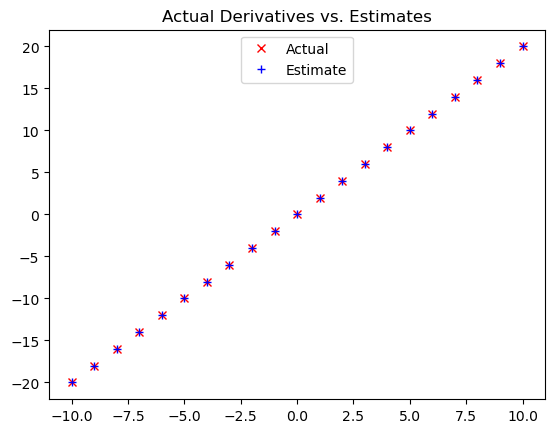

In [6]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.0001) for x in xs]

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [7]:
def partial_difference_quotient(
    f: Callable[[Vector], float], v: Vector, i: int, h: float
) -> float:
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h


def estimate_gradient(
    f: Callable[[Vector], float], v: Vector, h: float = 0.0001
) -> Vector:
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

In [8]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return v_add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001

0 [-1.9797386062213755, 2.1032086318939363, -2.358104113218915]
1 [-1.9401438340969481, 2.0611444592560577, -2.310942030954537]
2 [-1.901340957415009, 2.0199215700709368, -2.264723190335446]
3 [-1.8633141382667089, 1.979523138669518, -2.2194287265287374]
4 [-1.8260478555013746, 1.9399326758961277, -2.1750401519981626]
5 [-1.789526898391347, 1.9011340223782052, -2.1315393489581993]
6 [-1.75373636042352, 1.863111341930641, -2.0889085619790353]
7 [-1.7186616332150497, 1.8258491150920282, -2.0471303907394547]
8 [-1.6842884005507488, 1.7893321327901877, -2.0061877829246657]
9 [-1.6506026325397338, 1.7535454901343839, -1.9660640272661725]
10 [-1.6175905798889392, 1.718474580331696, -1.926742746720849]
11 [-1.5852387682911604, 1.6841050887250621, -1.8882078917864322]
12 [-1.5535339929253371, 1.6504229869505609, -1.8504437339507036]
13 [-1.5224633130668304, 1.6174145272115497, -1.8134348592716896]
14 [-1.4920140468054937, 1.5850662366673187, -1.7771661620862558]
15 [-1.4621737658693839, 1.5533

In [9]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]


def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = predicted - y
    squared_error = error**2
    grad = [2 * error * x, 2 * error]
    return grad

In [10]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

print("slope", slope)
print("intercept", intercept)

0 [33.94763489585167, 0.1664084999212555]
1 [10.692093932966852, 0.19002331781726478]
2 [26.20356337002893, 0.19033536511459706]
3 [15.857413567555815, 0.2061582577543968]
4 [22.758311308698026, 0.2116033548064438]
5 [18.155417960453224, 0.22393845940552892]
6 [21.225560158837105, 0.2316460004471711]
7 [19.177783020056097, 0.2424082686051138]
8 [20.543661133891188, 0.2511012350879597]
9 [19.632629124929664, 0.2611426937516749]
10 [20.240297516365665, 0.27025303748910123]
11 [19.83499180962159, 0.27995282893048873]
12 [20.10534041581133, 0.2892279150822493]
13 [19.925027170568924, 0.29875479966789614]
14 [20.045305632030196, 0.30808231723912927]
15 [19.965089225753097, 0.31751145823668114]
16 [20.018602997880922, 0.3268415245459608]
17 [19.98291864193797, 0.3362064444947498]
18 [20.006729472271868, 0.34551695024769824]
19 [19.990856958944914, 0.35483264581947477]
20 [20.001453241029562, 0.3641138374867808]
21 [19.99439480207077, 0.37338706305283675]
22 [19.99911205408185, 0.382634683728

In [11]:
T = TypeVar('T')

def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    if shuffle: random.shuffle(batch_starts)
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [12]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

print("slope", slope)
print("intercept", intercept)

0 [18.579583904197523, 7.961465576785685]
1 [20.00538724860429, 7.833156702035329]
2 [20.10771984944176, 7.798764497412306]
3 [19.994070831047267, 7.7808878413933975]
4 [19.880973836181823, 7.77023071149647]
5 [19.895703479430203, 7.645392185794682]
6 [20.11109692935665, 7.640628489594925]
7 [18.94729404706328, 7.577592815306171]
8 [18.934297873825095, 7.465685070726652]
9 [19.848537015715056, 7.512111525047576]
10 [20.08890222216304, 7.509134818403228]
11 [20.090321089750155, 7.493394188317333]
12 [20.37796254068209, 7.436590380713398]
13 [20.000064671675112, 7.4205871978068405]
14 [19.932696091712817, 7.4009459221196865]
15 [19.98538016771817, 7.386872018370662]
16 [19.051533119476268, 7.325454058886414]
17 [19.783702464198576, 7.334016168995501]
18 [20.529442735961073, 7.296452507503499]
19 [19.977545602729215, 7.247171908390102]
20 [19.859825202699653, 7.230277883262334]
21 [19.124475090268117, 7.164850257975164]
22 [20.005856662148293, 6.928843048747382]
23 [20.302874053967436, 6.

In [13]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

print("slope", slope)
print("intercept", intercept)

0 [20.11017690747534, -0.48373812455600523]
1 [20.105449257798615, -0.24846511136641927]
2 [20.100925086612186, -0.023286208466715728]
3 [20.09659502950649, 0.19223167233231464]
4 [20.092450725121587, 0.3985030249448402]
5 [20.088484249727415, 0.5959245602492652]
6 [20.084687931570954, 0.7848759687529129]
7 [20.08105450668575, 0.9657206507195126]
8 [20.07757696150675, 1.1388064154121673]
9 [20.074248625416754, 1.3044661496264027]
10 [20.07106306191054, 1.4630184576350116]
11 [20.06801419905596, 1.61476827489156]
12 [20.065096134656056, 1.7600074541731272]
13 [20.06230326316221, 1.8990153261134146]
14 [20.059630205410812, 2.032059236952645]
15 [20.057071864963508, 2.1593950635433443]
16 [20.05462326384617, 2.281267704331916]
17 [20.052279701989836, 2.397911549803208]
18 [20.05003674061953, 2.5095509357614048]
19 [20.04788996345175, 2.6164005723567434]
20 [20.045835304313442, 2.7186659572365475]
21 [20.043868796210738, 2.8165437722610873]
22 [20.041986658433146, 2.9102222606669854]
23 [2